### Student Details

Student name: Cathaoir Agnew

Student ID: 16171659

# Option 2: Linear and non-linear SVM

## Part 2: Probability outputs from Support Vector Machines

Support Vector Machines do not natively give a probability output, unlike Logistic Regression. However, it is possible to extend SVM to give a probability output. The exact details of how scikit-learn does this are given in [1], but you don't need to know all the details, and don't worry about reading the paper. Suffice to say, it is feasible to extend SVMs to give a probabilistic output, but this comes with significant extra processing cost.

1. Train a linear SVM on the same data as previous part of this task, but enable probability (literally, set `probability=True` in the SVC constructor)
2. Generate several thousand examples (e.g. 5000) within a valid range (e.g. in this case, both axes between -2.5 and +2.5 as the data is normalised). Make sure the generation is uniform.
3. Use the `predict_proba()` function to predict the probability of each sample falling within a class. A probability for each class will be returned for each sample (i.e. it will be a matrix of size (5000, 3))
4. Provide three scatter plots of our random samples, with the colour showing the probability (you can just use `c=probas[:,0]` and so on, which will provide a scaling from blue to yellow)

[1] Wu, Lin and Weng, “Probability estimates for multi-class classification by pairwise coupling”, JMLR 5:975-1005, 2004.


# Pulling in all preprocessing stuff from first notebook

In [1]:
# copying all preprocessing stuff from first notebook

import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)


# turning column into type category & then using cat-codes to convert to numbers, from above link 
df[" class"] = df[" class"].astype('category')

# creating a new column, just so I dont overwrite and lose the info
df["class_cat"] = df[" class"].cat.codes


# petal length and petal width
X = df.iloc[:, [2,3]].values

# now since we taking all flower types and not specific below makes more sense to use 
y = df['class_cat'].values

# rather than below, as above is more readible, but both work 
#Y = df.iloc[:, 5]


from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4 , stratify = y ) 


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaling the data
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# print scaled x train
#print(X_train_scale)

# print scaled x test
#print(X_test_scale)

#### Task 2 Part 1 
Train a linear SVM on the same data as previous part of this task, but enable probability (literally, set probability=True in the SVC constructor) 

In [2]:
from sklearn.svm import SVC

# initialize SVM classifier 
svm_clf_prob = SVC(kernel = 'linear', probability = True ) 

# train classifier 
svm_clf_prob.fit(X_train_scale, y_train)

SVC(kernel='linear', probability=True)

#### Task 2 Part 2 
Generate several thousand examples (e.g. 5000) within a valid range (e.g. in this case, both axes between -2.5 and +2.5 as the data is normalised). Make sure the generation is uniform. 

In [3]:
# creating 5000 new random samples
import random 
import pandas as pd 

# petal length and petal width
new_sample_petal_length = []
new_sample_petal_width = []

for i in range(5000):
    # these values used below were from etivity description, in essence were creating already scaled values
    new_sample_petal_length.append(random.uniform(-2.5, 2.5))
    new_sample_petal_width.append(random.uniform(-2.5, 2.5))
    
# zip them together in one list
rand_sample = list(zip(new_sample_petal_length, new_sample_petal_width)) 

#### Task 2 Part 3
Use the predict_proba() function to predict the probability of each sample falling within a class. A probability for each class will be returned for each sample (i.e. it will be a matrix of size (5000, 3)) 

In [4]:
y_pred_prob = svm_clf_prob.predict_proba(rand_sample)

#check shape as ciaran says it should be of size 5000,3 
print(y_pred_prob.shape)

# look at values
print(y_pred_prob)

(5000, 3)
[[0.02910269 0.36166882 0.60922849]
 [0.9796196  0.01166804 0.00871236]
 [0.48705714 0.4633236  0.04961926]
 ...
 [0.02893296 0.96271537 0.00835167]
 [0.99181212 0.00373671 0.00445117]
 [0.07724631 0.90559451 0.01715918]]


#### Task 2 Part 4
Provide three scatter plots of our random samples, with the colour showing the probability (you can just use c=probas[:,0] and so on, which will provide a scaling from blue to yellow) 

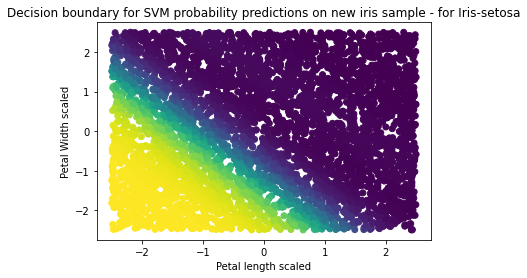

In [5]:
import matplotlib.pyplot as plt 

# plotting scatterplot of y_pred_prob[:,0] ie Setosa

plt.scatter(new_sample_petal_length, new_sample_petal_width , c= y_pred_prob[:,0] )
plt.title('Decision boundary for SVM probability predictions on new iris sample - for Iris-setosa')
plt.xlabel("Petal length scaled")
plt.ylabel("Petal Width scaled")
plt.show()

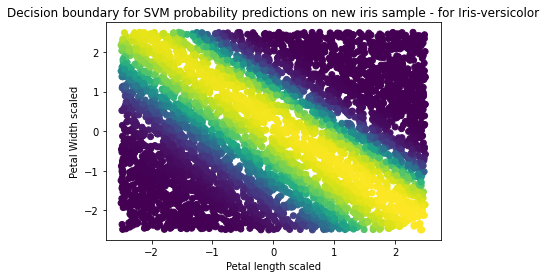

In [6]:
# plotting scatterplot of y_pred_prob[:,1] ie Versicolour

plt.scatter(new_sample_petal_length, new_sample_petal_width , c= y_pred_prob[:,1] )
plt.title('Decision boundary for SVM probability predictions on new iris sample - for Iris-versicolor')
plt.xlabel("Petal length scaled")
plt.ylabel("Petal Width scaled")
plt.show()

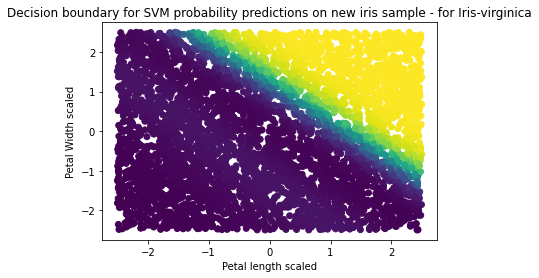

In [7]:
# plotting scatterplot of y_pred_prob[:,1] ie Virginica

plt.scatter(new_sample_petal_length, new_sample_petal_width , c= y_pred_prob[:,2] )
plt.title('Decision boundary for SVM probability predictions on new iris sample - for Iris-virginica')
plt.xlabel("Petal length scaled")
plt.ylabel("Petal Width scaled")
plt.show()

## Part 3: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Repeat for the multi-class Iris data.

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function 

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

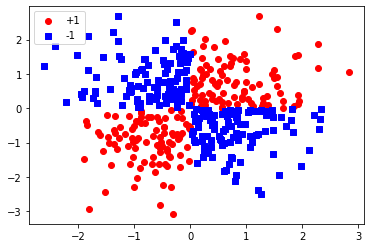

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

## Part 3 Task 1
Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data 

In [9]:
# setting up classifier & fitting to data 

from sklearn.svm import SVC

# initialize SVM classifier, with soft gamma = 0.1
svm_clf_non_linear = SVC(kernel = 'rbf', gamma = 0.1) 

# train classifier 
svm_clf_non_linear.fit(X_r, y_r)


SVC(gamma=0.1)

## Part 3 Task 2 

Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1) 

Plot function Provided by Ciaran on GitLab

In [10]:
# From https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/

import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    ax.set_title("Decision Boundary Plot")
    
    return fig, ax


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2547f8f5c70>)

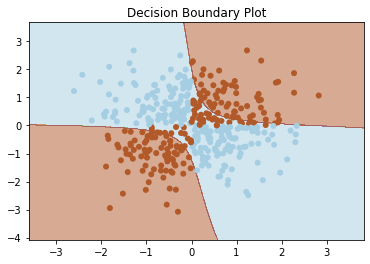

In [11]:
plot_decision_boundary(X_r, y_r, svm_clf_non_linear)

Looks to be a decent classifier, as by eye, splitting the data into roughly 4 squares/rectangles would of been my approach. Would generalize alot better than below gamma = 100 plot.

# Repeating with new gamma value of 100

In [12]:
# setting up classifier & fitting to data 

from sklearn.svm import SVC

# initialize SVM classifier 
svm_clf_non_linear_new_gam = SVC(kernel = 'rbf', gamma = 100) 

# train classifier 
svm_clf_non_linear_new_gam.fit(X_r, y_r)


SVC(gamma=100)

## Plotting Decision Boundary

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2540bcfcee0>)

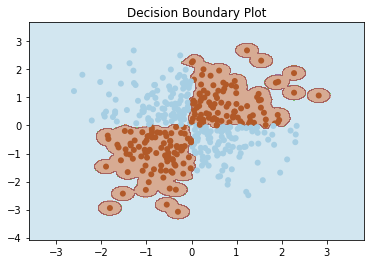

In [13]:
plot_decision_boundary(X_r, y_r, svm_clf_non_linear_new_gam)

## What happens? What is the problem with this result? Describe what is happening based on the resources.

**Simply put:**

gamma parameter defines how far the influence of a single training example reaches.

Low values - has a far reach <br>
High values - has a close reach


**More technical:**

The gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points.

A small gamma value defines a Gaussian function with a large variance. In this case, two points can be considered similar even if they are far away from each other.

A large gamma value defines a Gaussian function with a small variance. In this case, two points can be considered similar only if they are close to each other.

**In essence:**

The smaller the value of gamma the less complex the model is. The larger the value of gamma the more complex the model is.

When gamma is too small, the model is too constrained and doesnt fit well to the data. Example Andrew Ng uses is trying to model quadratic data points with a linear model. This is underfitting. 

When gamma is too large, the model learns the training data points too well and over fits the data. Which happens above when gamma = 100. The problem with overfitting is that the model will not generalize well and will usually perform poorly to unseen data points.

The currently level of gamma is too high causing the model to over fit 

# Repeating Multi-Class Iris Data, non-linear solution

X_train_scale, X_test_scale , y_train, y_test are all defined earlier in the notebook. So just going to use use them here

#### First is a soft gamma 0.1 

In [14]:
# setting up classifier & fitting to data 
from sklearn.svm import SVC

# initialize SVM classifier , going to use One vs rest, as class balances are fine. Each class (flower type)
# contained 50 samples in original data and we stratified y in the train_test_split
# so equal numbers for each of the classes in the train & test data. 33% of each.

svm_clf_non_linear_iris = SVC(kernel = 'rbf', gamma = 0.1 , decision_function_shape = 'ovr') 

# train classifier 
svm_clf_non_linear_iris.fit(X_train_scale, y_train)


SVC(gamma=0.1)

#### Plot of training decision boundary

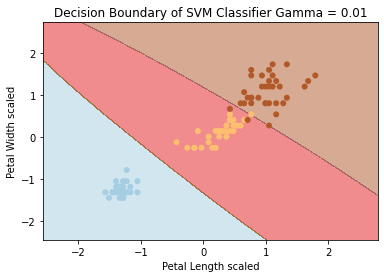

In [15]:
plot_decision_boundary(X_train_scale, y_train, svm_clf_non_linear_iris)
plt.title("Decision Boundary of SVM Classifier Gamma = 0.01")
plt.xlabel('Petal Length scaled')
plt.ylabel('Petal Width scaled')
plt.show()

#### Plot of decision boundary with test data

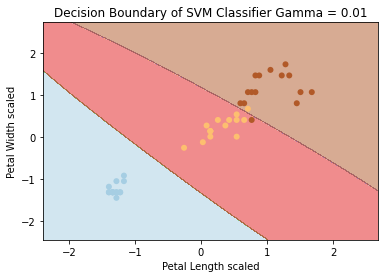

In [16]:
plot_decision_boundary(X_test_scale, y_test, svm_clf_non_linear_iris)
plt.title("Decision Boundary of SVM Classifier Gamma = 0.01")
plt.xlabel('Petal Length scaled')
plt.ylabel('Petal Width scaled')
plt.show()

#### Check of accuracy on test data

In [17]:
from sklearn.metrics import accuracy_score

y_pred_iris = svm_clf_non_linear_iris.predict(X_test_scale)

# Printing out the accuracy score on the X test 
print("SVM Classifier accuracy (in %):", accuracy_score(y_test , y_pred_iris)*100)

SVM Classifier accuracy (in %): 95.55555555555556


## Now for gamma = 100

In [18]:
# setting up classifier & fitting to data 

from sklearn.svm import SVC

# initialize SVM classifier , going to use One vs rest, as class balances are fine. Each class (flower type)
# contained 50 samples in original data and we stratified y in the train_test_split
# so equal numbers for each of the classes in the train & test data. 33% of each.

svm_clf_non_linear_iris_gam = SVC(kernel = 'rbf', gamma = 100 , decision_function_shape = 'ovr') 

# train classifier 
svm_clf_non_linear_iris_gam.fit(X_train_scale, y_train)

SVC(gamma=100)

#### Plot of training decision boundary

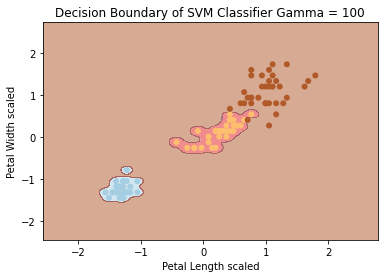

In [19]:
plot_decision_boundary(X_train_scale, y_train, svm_clf_non_linear_iris_gam)
plt.title("Decision Boundary of SVM Classifier Gamma = 100")
plt.xlabel('Petal Length scaled')
plt.ylabel('Petal Width scaled')
plt.show()

#### Plot of decision boundary with test data

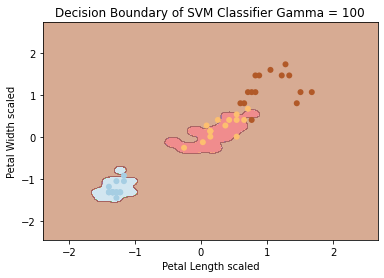

In [20]:
plot_decision_boundary(X_test_scale, y_test, svm_clf_non_linear_iris_gam)
plt.title("Decision Boundary of SVM Classifier Gamma = 100")
plt.xlabel('Petal Length scaled')
plt.ylabel('Petal Width scaled')
plt.show()

#### Check of accuracy on test data

In [21]:
from sklearn.metrics import accuracy_score

y_pred_iris_gam = svm_clf_non_linear_iris_gam.predict(X_test_scale)

# Printing out the accuracy score on the X test 
print("SVM Classifier accuracy (in %):", accuracy_score(y_test , y_pred_iris_gam)*100)

SVM Classifier accuracy (in %): 88.88888888888889


#### Quick Conclusion

Overfitting looks to have occured for the gamma = 100 model.

Gamma = 0.1 model looks like it would better generalize to unseen data. The higher test data accuracy on gamma = 0.1 would suggest this may be a better model than the gamma = 100. The really specific blobs in gamma = 100 plots, may not generalize well to unseen data. 